In [3]:
import os 
import re
import pandas as pd

# Import the wordcloud library
from wordcloud import WordCloud

# EDA for LDA
import gensim
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Convert tonkenized object as a corpus and document
import gensim.corpora as corpora

from pprint import pprint

# Visualise topics
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shgan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df = pd.read_csv("./Instagram_Posts_Extractor/result.csv")
df.head()

,postUrl,description,commentCount,likeCount,pubDate,likedByViewer,isSidecar,type,profileUrl,username,...,taggedFullName2,taggedUsername2,location,locationId,taggedFullName3,taggedUsername3,taggedFullName4,taggedUsername4,taggedFullName5,taggedUsername5
0,https://www.instagram.com/p/CbWgkYuBvN_/,"It’s World Down Syndrome Day, and this year, w...",2,69,2022-03-21T04:00:59.000Z,False,True,Photo,https://www.instagram.com/msfcares,msfcares,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/p/CbWgkYuBvN_/,"It’s World Down Syndrome Day, and this year, w...",2,69,2022-03-21T04:00:59.000Z,False,True,Photo,https://www.instagram.com/msfcares,msfcares,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/p/CbJcPjVJS9e/,Our colleagues at Child Protective Service (CP...,0,114,2022-03-16T02:14:17.000Z,False,False,Video,https://www.instagram.com/msfcares,msfcares,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/p/CbHTInSpf7l/,Happy Social Work Day! Thank you to all our so...,0,149,2022-03-15T06:15:00.000Z,False,True,Photo,https://www.instagram.com/msfcares,msfcares,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/p/CbHTInSpf7l/,Happy Social Work Day! Thank you to all our so...,0,149,2022-03-15T06:15:00.000Z,False,True,Photo,https://www.instagram.com/msfcares,msfcares,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# check missing aka NO captions
df['description'].isnull().sum()

0

In [15]:
# Preprocessing on captions to make them more amenable for analysis, and reliable results. 
# RegEx to remove any punctuation, and then lowercase the text

# Drop duplicate
# df.drop_duplicates(subset=['description'], inplace = True)

# Remove punctuation
df['desc_processed'] = df['description'].str.replace(r'[^\w\s]', '')

# Convert to lowercase
df['desc_processed'] = df['desc_processed'].str.lower()

# Replace null values (no caption) with 'null'
df['desc_processed'].fillna('null', inplace = True)

# Print out the first rows of papers
df['desc_processed'].head()

C:\Users\shgan\AppData\Local\Temp\ipykernel_20652\2414313794.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['desc_processed'] = df['description'].str.replace(r'[^\w\s]', '')


0    its world down syndrome day and this year we r...
1    its world down syndrome day and this year we r...
2    our colleagues at child protective service cps...
3    happy social work day thank you to all our soc...
4    happy social work day thank you to all our soc...
Name: desc_processed, dtype: object

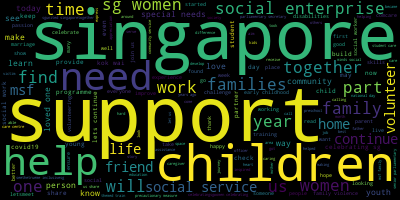

In [16]:
data = list((df['desc_processed']))

def create_cloud(data):
    text = ','.join(data)

    # Create a WordCloud object
    wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')

    # Generate a word cloud
    wordcloud.generate(text)
    
    return wordcloud
    
wordcloud = create_cloud(data)
# Visualize the word cloud
wordcloud.to_image()

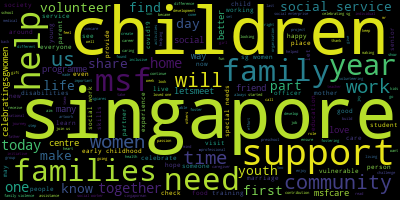

In [17]:
# Join the different distinct processed titles together.
data = list(set(df['desc_processed']))

wordcloud = create_cloud(data)
wordcloud.to_image()

In [18]:
# EDA to transfrom caption into inputs for LDA 

stop_words = stopwords.words('english')
# print(len(stop_words))
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'us', 'like', 'also', 'society', 'societies', 'sgchildren', 
                   'sgchild', 'sgchildrens', 'sgchildrensoc', 'childrens', 'children', 'childs', 'child', 'singapore', 'social'])
# print(len(stop_words))

def to_words(sentences):
    for sentence in sentences:
        # deacc = True removes punctuations
        yield(simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word.lower() not in stop_words] for doc in texts]

data_words = list(to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words)

[['thank', 'biggest', 'cheerleaders', 'teachers', 'life', 'happymothersday'], ['giving', 'tuition', 'primary', 'secondary', 'school', 'students', 'university', 'days', 'even', 'dawned', 'disposition', 'aptitude', 'teaching', 'early', 'childhood', 'development', 'agency', 'scholarship', 'recipient', 'mr', 'mohammad', 'aizat', 'bin', 'hashim', 'finds', 'joy', 'fulfilment', 'role', 'principal', 'nurturing', 'learning', 'journey', 'growth', 'champion', 'activelearning', 'mr', 'aizat', 'enjoys', 'taking', 'lessons', 'real', 'world', 'even', 'dissected', 'fish', 'front', 'yearolds', 'teach', 'food', 'comes', 'msfcares'], ['earthday', 'might', 'oneday', 'celebration', 'showing', 'love', 'planet', 'everyday', 'affair', 'check', 'highlights', 'green', 'initiatives', 'share', 'going', 'green', 'home', 'today', 'together', 'lets', 'continue', 'reduce', 'carbonfootprint', 'help', 'fight', 'climatechange'], ['want', 'make', 'outdoor', 'learning', 'fun', 'exciting', 'developmental', 'come', 'join', 

In [19]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1)], [(12, 1), (19, 1), (32, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1)], [(3, 1), (27, 1), (42, 1), (65, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1)

In [20]:
# LDA model training
# build a model with 5 topics 
# where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic

# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word = id2word,
                                       num_topics = num_topics)
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"families" + 0.006*"women" + 0.006*"support" + 0.005*"care" + '
  '0.005*"community" + 0.004*"home" + 0.004*"together" + 0.004*"years" + '
  '0.004*"one" + 0.003*"needs"'),
 (1,
  '0.010*"family" + 0.008*"help" + 0.007*"work" + 0.007*"together" + '
  '0.006*"support" + 0.006*"community" + 0.005*"women" + 0.005*"time" + '
  '0.005*"today" + 0.005*"msf"'),
 (2,
  '0.006*"support" + 0.005*"work" + 0.004*"service" + 0.004*"day" + '
  '0.004*"community" + 0.003*"family" + 0.003*"one" + 0.003*"young" + '
  '0.003*"care" + 0.003*"share"'),
 (3,
  '0.005*"support" + 0.004*"work" + 0.004*"happy" + 0.004*"good" + '
  '0.004*"community" + 0.004*"food" + 0.004*"today" + 0.004*"day" + '
  '0.003*"families" + 0.003*"msf"'),
 (4,
  '0.009*"support" + 0.006*"help" + 0.006*"community" + 0.006*"service" + '
  '0.005*"families" + 0.005*"family" + 0.005*"need" + 0.005*"msf" + '
  '0.004*"msfcares" + 0.004*"work"')]


In [21]:
# Analyzing LDA model results
# Visualise for interpretability

# Better understanding and interpreting individual topics
    # manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.
# Better understanding the relationships between the topics.
    # Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+ str(num_topics))

if True:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

C:\Users\shgan\miniconda3\envs\gpu\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.017475  0.000704       1        1  34.410368
1      0.030099 -0.018186       2        1  25.956579
0      0.016105  0.034023       3        1  16.314384
2     -0.021867 -0.035321       4        1  12.587849
3     -0.041812  0.018780       5        1  10.730821, topic_info=         Term       Freq      Total Category  logprob  loglift
159       day  42.000000  42.000000  Default  30.0000  30.0000
742      hope  16.000000  16.000000  Default  29.0000  29.0000
78   together  57.000000  57.000000  Default  28.0000  28.0000
258      good  32.000000  32.000000  Default  27.0000  27.0000
154      work  75.000000  75.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
126      need   3.970332  56.394817   Topic5  -6.0381  -0.4215
293    skills   3.322818  24.489830   Topic5  -6.2162   0.2346
255    family   4.237803  87.698127   Topic5  -5.9730  -0.7978
526    foster   3.347516  30.786620   Topic5  -6.2088   0.0132
277     needs   3.363260  41.266836   Topic5  -6.2041  -0.2751

[433 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1343      3  0.691192   accessible
1343      4  0.230397   accessible
911       1  0.356540  accommodate
911       2  0.356540  accommodate
911       5  0.356540  accommodate
...     ...       ...          ...
652       1  0.439966       youths
652       2  0.087993       youths
652       3  0.175986       youths
652       4  0.131990       youths
652       5  0.175986       youths

[828 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 4])